# Importing libraries and pre-processing of data

In [ ]:
#only use for Google Colab
#from google.colab import drive
#drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
#import data to store in a dataframe variable
df = pd.read_csv('haberman.csv') #use for local file
#df = pd.read_csv('/content/gdrive/MyDrive/datasci/haberman.csv') #for google colab only
df

,Age,Year,Axillary,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
#replace the "2" in Status into 0 for binary classification
df.loc[df['Status'] == 2, 'Status'] = 0
df

,Age,Year,Axillary,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0


In [ ]:
# Explore data, 306 rows with 4 columns
df.shape

(306, 4)

In [ ]:
# count how many items in each column
df.count()

Age         306
Year        306
Axillary    306
Status      306
dtype: int64

In [ ]:
# verify if there are null values
df.isnull().sum()

Age         0
Year        0
Axillary    0
Status      0
dtype: int64

# Exploratory Data Analysis

## General Description of Dataset


In [ ]:
# count the amount of patients based on age groups; patient age is grouped to 30-40, 41-50, 51-60, 61-70, and 71+
age_count = pd.Series([df["Age"].loc[(df["Age"] >= 30) & (df["Age"]<= 40)].count(), 
                             df["Age"].loc[(df["Age"] >= 41) & (df["Age"]<= 50)].count(), 
                             df["Age"].loc[(df["Age"] >= 51) & (df["Age"]<= 60)].count(),
                             df["Age"].loc[(df["Age"] >= 61) & (df["Age"]<= 70)].count(),
                             df["Age"].loc[(df["Age"] >= 71)].count()]) 

age_count_df = pd.DataFrame({"Age Group": ["30-40","41-50","51-60","61-70","71+"], 
                             "Count": [age_count[0], age_count[1], age_count[2], age_count[3], age_count[4]]})

# display with center alignment style and hiding index
age_count_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).hide_index()

Age Group,Count
30-40,43
41-50,93
51-60,93
61-70,63
71+,14


In [ ]:
df[["Age"]].value_counts().head(10) # count the most frequent patient age in the dataset

Age
52     14
54     13
50     12
47     11
53     11
43     11
57     11
49     10
65     10
55     10
dtype: int64

In [ ]:
df[["Age"]].value_counts().tail(10) # count the least frequent patient age in the dataset

Age
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
dtype: int64

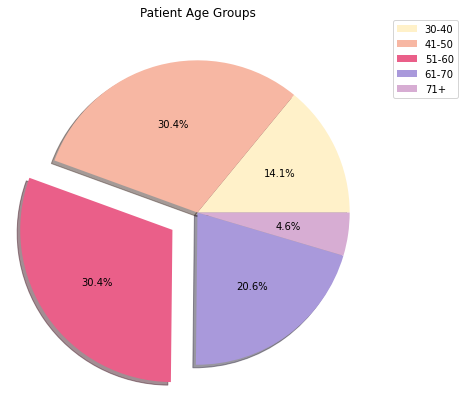

In [ ]:
colors = ["#FFF1C9", "#F7B7A3", "#EA5F89", "#A999DB", "#D7ADD3"]

# plotting the amount of patients based on age groups
age_count.plot(kind="pie", autopct='%1.1f%%', shadow=True, colors=colors, explode=[0, 0, 0.2, 0, 0],
               legend=True, title='Patient Age Groups', ylabel='', labeldistance=None, figsize = (7,7))

plt.legend([age_count_df["Age Group"][0], age_count_df["Age Group"][1], age_count_df["Age Group"][2], 
            age_count_df["Age Group"][3], age_count_df["Age Group"][4]], bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
# count the amount of patients based on year groups; patient surgery years are grouped to 1958-1960, 1961-1963, 1964-1966, and 1967-1969
year_count = pd.Series([df["Year"].loc[(df["Year"] >= 58) & (df["Year"]<= 60)].count(), 
                             df["Year"].loc[(df["Year"] >= 61) & (df["Year"]<= 63)].count(), 
                             df["Year"].loc[(df["Year"] >= 64) & (df["Year"]<= 66)].count(),
                             df["Year"].loc[(df["Year"] >= 67) & (df["Year"]<= 69)].count()])

year_count_df = pd.DataFrame({"Year": ["1958-1960", "1961-1963", "1964-1966", "1967-1969"], 
                              "Count": [year_count[0], year_count[1], year_count[2], year_count[3]]})

# display with center alignment style and hiding index
year_count_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).hide_index()

Year,Count
1958-1960,91
1961-1963,79
1964-1966,87
1967-1969,49


In [ ]:
df["Year"].value_counts() # count the frquency of patient surgery year in the dataset in descending order

58    36
64    31
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Year, dtype: int64

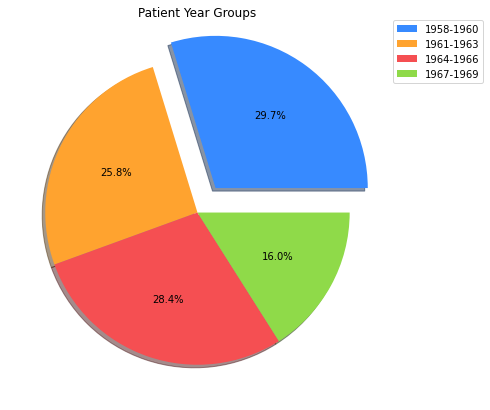

In [ ]:
colors = ["#378AFF", "#FFA32F", "#F54F52", "#8FDA49"]

# plotting the amount of patients based on surgery year groups
year_count.plot(kind="pie", autopct='%1.1f%%', shadow=True, colors=colors, explode = [0.2, 0, 0, 0],
                legend=True, title='Patient Year Groups', ylabel='', labeldistance=None, figsize = (7,7))

plt.legend([year_count_df["Year"][0], year_count_df["Year"][1], 
            year_count_df["Year"][2], year_count_df["Year"][3]], bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
# count the amount of patients based on the number of axillary nodes detected; # of axillary nodes are divided to 0, 1, 2, 3, 4, 5, 6-10, 11-20, and 21+
axillary_count = pd.Series([df["Axillary"].loc[df["Axillary"] == 0].count(), df["Axillary"].loc[df["Axillary"] == 1].count(),
                       df["Axillary"].loc[df["Axillary"] == 2].count(), df["Axillary"].loc[df["Axillary"] == 3].count(),
                       df["Axillary"].loc[df["Axillary"] == 4].count(), df["Axillary"].loc[df["Axillary"] == 5].count(),
                       df["Axillary"].loc[(df["Axillary"] >= 6) & (df["Axillary"] <= 10)].count(), 
                       df["Axillary"].loc[(df["Axillary"] >= 11) & (df["Axillary"] <= 20)].count(),
                       df["Axillary"].loc[df["Axillary"] >= 21].count()])

axillary_count_df = pd.DataFrame({"# of Axillary": ["0", "1", "2", "3", "4", "5", "6-10", "11-20", "20+"], 
                              "Count": [axillary_count[0], axillary_count[1], axillary_count[2], axillary_count[3], 
                                        axillary_count[4], axillary_count[5], axillary_count[6], axillary_count[7],
                                        axillary_count[8]]})

# display with center alignment style and hiding index
axillary_count_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).hide_index()

# of Axillary,Count
0,136
1,41
2,20
3,20
4,13
5,6
6-10,30
11-20,26
20+,14


In [ ]:
df["Axillary"].value_counts().head(10) # count the most frequent axillary node count in the dataset

0    136
1     41
3     20
2     20
4     13
7      7
6      7
8      7
9      6
5      6
Name: Axillary, dtype: int64

In [ ]:
df["Axillary"].value_counts().tail(20) # count the least frequent axillary node count in the dataset

14    4
11    4
22    3
19    3
23    3
15    3
10    3
20    2
12    2
21    1
52    1
30    1
16    1
24    1
46    1
18    1
35    1
17    1
25    1
28    1
Name: Axillary, dtype: int64

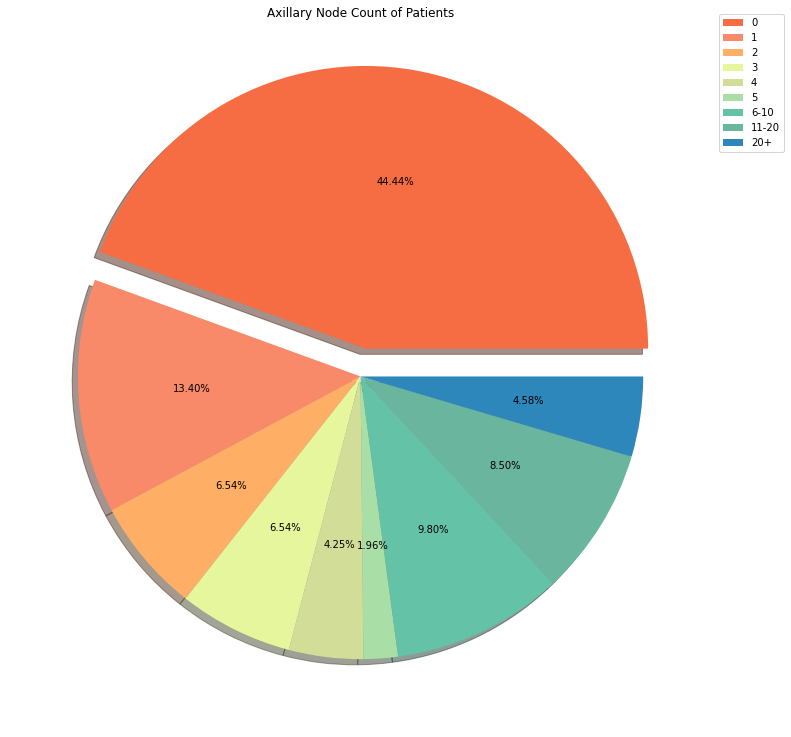

In [ ]:
# function to place add percentages that is more than 4%
#def my_autopct(pct):
    #return ('%.2f' % pct + "%") if pct > 4 else ''

colors = ["#F66D44", "#F88A69", "#FEAE65", "#E6F69D", "#D2DE97", "#AADEA7", "#64C2A6", "#6AB59E", "#2D87BB"]

# plotting the amount of patients based on # of axillary nodes detected
axillary_count.plot(kind="pie", autopct='%1.2f%%', colors=colors, explode = [0.1,0,0,0,0,0,0,0,0], shadow=True,
                    legend=True, title='Axillary Node Count of Patients', ylabel='', labeldistance=None, figsize = (13,13))

plt.legend([axillary_count_df["# of Axillary"][0], axillary_count_df["# of Axillary"][1], axillary_count_df["# of Axillary"][2], 
            axillary_count_df["# of Axillary"][3], axillary_count_df["# of Axillary"][4], axillary_count_df["# of Axillary"][5], 
            axillary_count_df["# of Axillary"][6], axillary_count_df["# of Axillary"][7], axillary_count_df["# of Axillary"][8]], 
            bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
# count the amount of patients based on survival status; 0 - within 5 years, 1 - 5 years or more
status_count = pd.Series([df["Status"].loc[df["Status"] == 0].count(), df["Status"].loc[df["Status"] == 1].count()])

status_count_df = pd.DataFrame({"Status": ["Within 5 years", "5 years or more"], 
                              "Count": [status_count[0], status_count[1],]})

# display with center alignment style and hiding index
status_count_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).hide_index()

Status,Count
Within 5 years,81
5 years or more,225


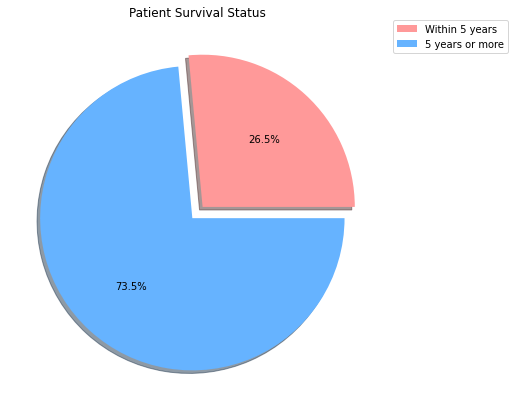

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# plotting the amount of patients based on survival status
status_count.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors,
                legend=True, title='Patient Survival Status', ylabel='', labeldistance=None, figsize = (7,7))

plt.legend([status_count_df["Status"][0], status_count_df["Status"][1]], bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
df.describe() # other description for the dataset variables

,Age,Year,Axillary,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


## Variable Analysis

### Status and Age

In [ ]:
# displaying the 5 age groups, their totals, and the distribution in terms of survival status

status_age_value0 = pd.Series([df["Status"].loc[(df["Age"] >= 30) & (df["Age"]<= 40) & (df["Status"] == 0)].count(),
                               df["Status"].loc[(df["Age"] >= 41) & (df["Age"]<= 50) & (df["Status"] == 0)].count(),
                               df["Status"].loc[(df["Age"] >= 51) & (df["Age"]<= 60) & (df["Status"] == 0)].count(),
                               df["Status"].loc[(df["Age"] >= 61) & (df["Age"]<= 70) & (df["Status"] == 0)].count(),
                               df["Status"].loc[(df["Age"] >= 71) & (df["Status"] == 0)].count()])

status_age_value1 = pd.Series([df["Status"].loc[(df["Age"] >= 30) & (df["Age"]<= 40) & (df["Status"] == 1)].count(), 
                               df["Status"].loc[(df["Age"] >= 41) & (df["Age"]<= 50) & (df["Status"] == 1)].count(), 
                               df["Status"].loc[(df["Age"] >= 51) & (df["Age"]<= 60) & (df["Status"] == 1)].count(),
                               df["Status"].loc[(df["Age"] >= 61) & (df["Age"]<= 70) & (df["Status"] == 1)].count(),
                               df["Status"].loc[(df["Age"] >= 71) & (df["Status"] == 1)].count()])

STATUS_AGE = pd.DataFrame({"Age":[age_count_df["Age Group"][0], age_count_df["Age Group"][1], age_count_df["Age Group"][2], 
                                    age_count_df["Age Group"][3], age_count_df["Age Group"][4]],
                             "Count":[age_count[0], age_count[1], age_count[2], age_count[3], age_count[4]],
                             "Within 5 years": [status_age_value0[0], status_age_value0[1], status_age_value0[2], status_age_value0[3], status_age_value0[4]],
                             "5 Years or Longer": [status_age_value1[0], status_age_value1[1], status_age_value1[2], status_age_value1[3], status_age_value1[4]],
                             "% of 5 years or longer": [(status_age_value1[0]/age_count[0])*100, (status_age_value1[1]/age_count[1])*100,
                                                        (status_age_value1[2]/age_count[2])*100, (status_age_value1[3]/age_count[3])*100, 
                                                        (status_age_value1[4]/age_count[4])*100]})

STATUS_AGE["% of 5 years or longer"] = STATUS_AGE["% of 5 years or longer"].round(2)
STATUS_AGE.style.hide_index()

Age,Count,Within 5 years,5 Years or Longer,% of 5 years or longer
30-40,43,4,39,90.700000
41-50,93,29,64,68.820000
51-60,93,26,67,72.040000
61-70,63,18,45,71.430000
71+,14,4,10,71.430000


In [ ]:
# analysis to check which ages has more patients surviving within 5 years or 5 years or longer
STAT_AGE0 = df.loc[df["Status"] == 0].groupby("Status")["Age"].value_counts().sort_values(ascending=False).head(10)
STAT_AGE1 = df.loc[df["Status"] == 1].groupby("Status")["Age"].value_counts().sort_values(ascending=False).head(10)
STAT_AGE_OVERALL = STAT_AGE0.append(STAT_AGE1)
STAT_AGE_OVERALL

Status  Age
0       53      6
        46      4
        52      4
        54      4
        65      4
        43      4
        48      3
        62      3
        61      3
        57      3
1       50     10
        52     10
        38      9
        54      9
        47      8
        49      8
        55      8
        57      8
        58      7
        63      7
Name: Age, dtype: int64

Text(0.5, 1.0, 'Survival Status in Terms of Patient Age')

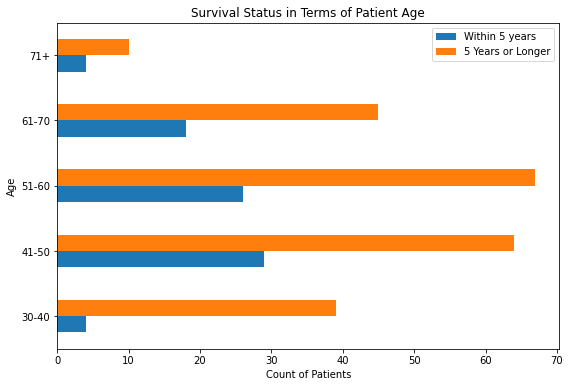

In [ ]:
# displaying survival status distribution based on age through bar chart

index = [STATUS_AGE["Age"][0], STATUS_AGE["Age"][1], STATUS_AGE["Age"][2], STATUS_AGE["Age"][3], STATUS_AGE["Age"][4]]

STATUS_AGE_PLOT = pd.DataFrame ({"Within 5 years": [status_age_value0[0], status_age_value0[1], status_age_value0[2], status_age_value0[3], status_age_value0[4]],
                                 "5 Years or Longer": [status_age_value1[0], status_age_value1[1], status_age_value1[2], status_age_value1[3], status_age_value1[4]]}, 
                                index=index)

STATUS_AGE_PLOT.plot(kind="barh", figsize=(9,6)) 
plt.xlabel('Count of Patients')
plt.ylabel('Age')
plt.title('Survival Status in Terms of Patient Age')

Text(0.5, 1.0, 'Age of Patients who survived within 5 years')

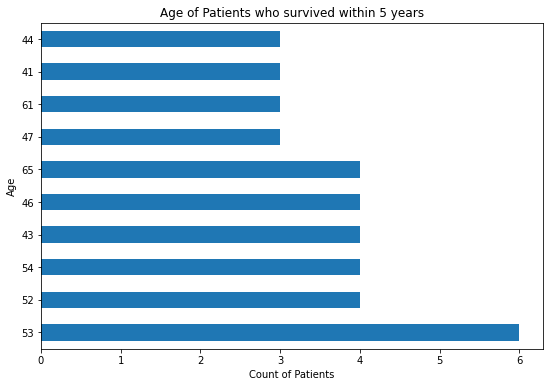

In [ ]:
# Display the most frequent patient age values distribution in terms of "within 5 years" survival status through bar graph
STAT_AGE0_VALUES = df.groupby("Status").get_group(0)["Age"].value_counts().head(10)
STAT_AGE0_VALUES.plot(kind="barh", figsize=(9,6)) 
plt.xlabel('Count of Patients')
plt.ylabel('Age')
plt.title('Age of Patients who survived within 5 years')

Text(0.5, 1.0, 'Age of Patients who survived for 5 years or longer')

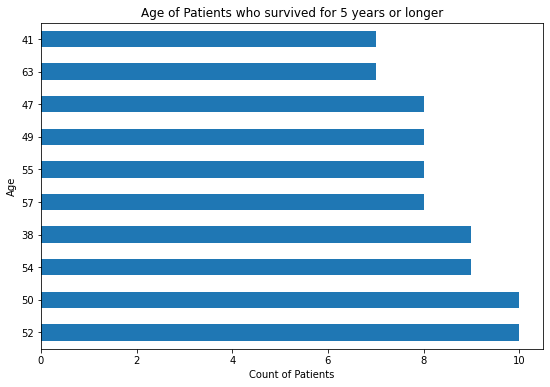

In [ ]:
# Display the most frequent patient age values distribution in terms of "5 years or longer" survival status through bar graph
STAT_AGE1_VALUES = df.groupby("Status").get_group(1)["Age"].value_counts().head(10)
STAT_AGE1_VALUES.plot(kind="barh", figsize=(9,6)) # plot the bar chart
plt.xlabel('Count of Patients')
plt.ylabel('Age')
plt.title('Age of Patients who survived for 5 years or longer')

### Status and Year

In [ ]:
# displaying the 4 year groups, their totals, and the distribution in terms of survival status

status_year_value0 = pd.Series([df["Status"].loc[(df["Year"] >= 58) & (df["Year"] <= 60) & (df["Status"] == 0)].count(), 
                             df["Status"].loc[(df["Year"] >= 61) & (df["Year"] <= 63) & (df["Status"] == 0)].count(), 
                             df["Status"].loc[(df["Year"] >= 64) & (df["Year"] <= 66) & (df["Status"] == 0)].count(),
                             df["Status"].loc[(df["Year"] >= 67) & (df["Year"] <= 69) & (df["Status"] == 0)].count()])

status_year_value1 = pd.Series([df["Status"].loc[(df["Year"] >= 58) & (df["Year"] <= 60) & (df["Status"] == 1)].count(), 
                             df["Status"].loc[(df["Year"] >= 61) & (df["Year"] <= 63) & (df["Status"] == 1)].count(), 
                             df["Status"].loc[(df["Year"] >= 64) & (df["Year"] <= 66) & (df["Status"] == 1)].count(),
                             df["Status"].loc[(df["Year"] >= 67) & (df["Year"] <= 69) & (df["Status"] == 1)].count()])

STATUS_YEAR = pd.DataFrame({"Year":[year_count_df["Year"][0], year_count_df["Year"][1], year_count_df["Year"][2], year_count_df["Year"][3]],
                             "Count":[year_count[0], year_count[1], year_count[2], year_count[3]],
                             "Within 5 years": [status_year_value0[0], status_year_value0[1], status_year_value0[2], status_year_value0[3]],
                             "5 Years or Longer": [status_year_value1[0], status_year_value1[1], status_year_value1[2], status_year_value1[3]],
                             "% of 5 years or longer": [(status_year_value1[0]/year_count[0])*100, (status_year_value1[1]/year_count[1])*100,
                                                        (status_year_value1[2]/year_count[2])*100, (status_year_value1[3]/year_count[3])*100]})

STATUS_YEAR["% of 5 years or longer"] = STATUS_YEAR["% of 5 years or longer"].round(2)
STATUS_YEAR.style.hide_index()

Year,Count,Within 5 years,5 Years or Longer,% of 5 years or longer
1958-1960,91,25,66,72.530000
1961-1963,79,18,61,77.220000
1964-1966,87,27,60,68.970000
1967-1969,49,11,38,77.550000


In [ ]:
# analysis to check which years has more patients surviving within 5 years or 5 years or longer
STAT_YEAR0 = df.loc[df["Status"] == 0].groupby("Status")["Year"].value_counts().sort_values(ascending=False)
STAT_YEAR1 = df.loc[df["Status"] == 1].groupby("Status")["Year"].value_counts().sort_values(ascending=False)
STAT_YEAR_OVERALL = STAT_YEAR0.append(STAT_YEAR1)
STAT_YEAR_OVERALL

Status  Year
0       65      13
        58      12
        59       9
        63       8
        64       8
        62       7
        66       6
        60       4
        67       4
        69       4
        61       3
        68       3
1       58      24
        60      24
        61      23
        64      23
        63      22
        66      22
        67      21
        59      18
        62      16
        65      15
        68      10
        69       7
Name: Year, dtype: int64

Text(0.5, 1.0, 'Survival Status in Terms of Patient Operation Year')

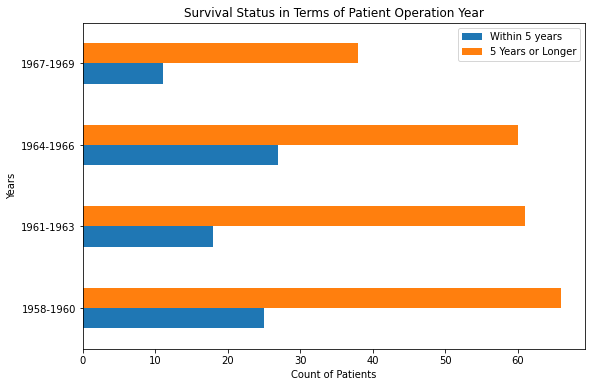

In [ ]:
# displaying survival status distribution based on year groups through bar chart

index = [STATUS_YEAR["Year"][0], STATUS_YEAR["Year"][1], STATUS_YEAR["Year"][2], STATUS_YEAR["Year"][3]]

STATUS_YEAR_PLOT = pd.DataFrame ({"Within 5 years": [status_year_value0[0], status_year_value0[1], status_year_value0[2], status_year_value0[3]],
                                 "5 Years or Longer": [status_year_value1[0], status_year_value1[1], status_year_value1[2], status_year_value1[3]]}, 
                                index=index)

STATUS_YEAR_PLOT.plot(kind="barh", figsize=(9,6)) 
plt.xlabel('Count of Patients')
plt.ylabel('Years')
plt.title('Survival Status in Terms of Patient Operation Year')

Text(0.5, 1.0, 'Surgery Year of Patients who survived within 5 years')

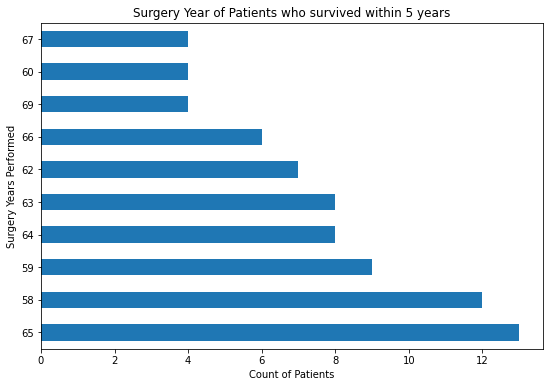

In [ ]:
# Display the most frequent patient year values distribution in terms of "within 5 years" survival status through bar graph
STAT_YEAR0_VALUES = df.groupby("Status").get_group(0)["Year"].value_counts().head(10)
STAT_YEAR0_VALUES.plot(kind="barh", figsize=(9,6)) # plot the bar chart
plt.xlabel('Count of Patients')
plt.ylabel('Surgery Years Performed')
plt.title('Surgery Year of Patients who survived within 5 years')

Text(0.5, 1.0, 'Surgery Year of Patients who survived for 5 years or longer')

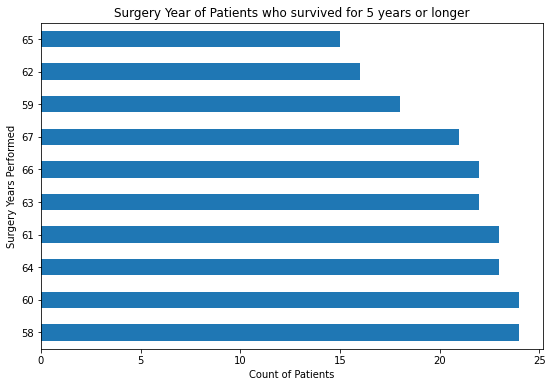

In [ ]:
# Display the most frequent patient year values distribution in terms of "5 years or longer" survival status through bar graph
STAT_YEAR1_VALUES = df.groupby("Status").get_group(1)["Year"].value_counts().head(10)
STAT_YEAR1_VALUES.plot(kind="barh", figsize=(9,6)) # plot the bar chart
plt.xlabel('Count of Patients')
plt.ylabel('Surgery Years Performed')
plt.title('Surgery Year of Patients who survived for 5 years or longer')

### Status and Number of Positive Axillary Nodes Detected

In [ ]:
# displaying the 9 axillary node values/groups, their totals, and the distribution in terms of survival status

status_axillary_value0 = pd.Series([df["Status"].loc[(df["Axillary"] == 0) & (df["Status"] == 0)].count(), df["Status"].loc[(df["Axillary"] == 1) & (df["Status"] == 0)].count(),
                                   df["Status"].loc[(df["Axillary"] == 2) & (df["Status"] == 0)].count(), df["Status"].loc[(df["Axillary"] == 3) & (df["Status"] == 0)].count(),
                                   df["Status"].loc[(df["Axillary"] == 4) & (df["Status"] == 0)].count(), df["Status"].loc[(df["Axillary"] == 5) & (df["Status"] == 0)].count(),
                                   df["Status"].loc[(df["Axillary"] >= 6) & (df["Axillary"] <= 10) & (df["Status"] == 0)].count(), 
                                   df["Status"].loc[(df["Axillary"] >= 11) & (df["Axillary"] <= 20) & (df["Status"] == 0)].count(),
                                   df["Status"].loc[(df["Axillary"] >= 21) & (df["Status"] == 0)].count()])

status_axillary_value1 = pd.Series([df["Status"].loc[(df["Axillary"] == 0) & (df["Status"] == 1)].count(), df["Status"].loc[(df["Axillary"] == 1) & (df["Status"] == 1)].count(),
                                   df["Status"].loc[(df["Axillary"] == 2) & (df["Status"] == 1)].count(), df["Status"].loc[(df["Axillary"] == 3) & (df["Status"] == 1)].count(),
                                   df["Status"].loc[(df["Axillary"] == 4) & (df["Status"] == 1)].count(), df["Status"].loc[(df["Axillary"] == 5) & (df["Status"] == 1)].count(),
                                   df["Status"].loc[(df["Axillary"] >= 6) & (df["Axillary"] <= 10) & (df["Status"] == 1)].count(), 
                                   df["Status"].loc[(df["Axillary"] >= 11) & (df["Axillary"] <= 20) & (df["Status"] == 1)].count(),
                                   df["Status"].loc[(df["Axillary"] >= 21) & (df["Status"] == 1)].count()])

STATUS_AXILLARY = pd.DataFrame({"# of Axillary":[axillary_count_df["# of Axillary"][0], axillary_count_df["# of Axillary"][1], axillary_count_df["# of Axillary"][2], 
                                                 axillary_count_df["# of Axillary"][3], axillary_count_df["# of Axillary"][4], axillary_count_df["# of Axillary"][5],
                                                 axillary_count_df["# of Axillary"][6], axillary_count_df["# of Axillary"][7], axillary_count_df["# of Axillary"][8]],
                                "Count":[axillary_count[0], axillary_count[1], axillary_count[2], axillary_count[3], axillary_count[4], axillary_count[5], axillary_count[6],
                                        axillary_count[7], axillary_count[8]],
                                "Within 5 years": [status_axillary_value0[0], status_axillary_value0[1], status_axillary_value0[2], status_axillary_value0[3], 
                                                  status_axillary_value0[4], status_axillary_value0[5], status_axillary_value0[6], status_axillary_value0[7],
                                                  status_axillary_value0[8]],
                                "5 Years or Longer": [status_axillary_value1[0], status_axillary_value1[1], status_axillary_value1[2], status_axillary_value1[3], 
                                                      status_axillary_value1[4], status_axillary_value1[5], status_axillary_value1[6], status_axillary_value1[7],
                                                      status_axillary_value1[8]],
                                "% of 5 years or longer": [(status_axillary_value1[0]/axillary_count[0])*100, (status_axillary_value1[1]/axillary_count[1])*100,
                                                           (status_axillary_value1[2]/axillary_count[2])*100, (status_axillary_value1[3]/axillary_count[3])*100,
                                                           (status_axillary_value1[4]/axillary_count[4])*100, (status_axillary_value1[5]/axillary_count[5])*100,
                                                           (status_axillary_value1[6]/axillary_count[6])*100, (status_axillary_value1[7]/axillary_count[7])*100,
                                                           (status_axillary_value1[8]/axillary_count[8])*100]})

STATUS_AXILLARY["% of 5 years or longer"] = STATUS_AXILLARY["% of 5 years or longer"].round(2)
STATUS_AXILLARY.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).hide_index()

# of Axillary,Count,Within 5 years,5 Years or Longer,% of 5 years or longer
0,136,19,117,86.030000
1,41,8,33,80.490000
2,20,5,15,75.000000
3,20,7,13,65.000000
4,13,3,10,76.920000
5,6,4,2,33.330000
6-10,30,12,18,60.000000
11-20,26,15,11,42.310000
20+,14,8,6,42.860000


In [ ]:
# analysis to check which # of axillary nodes detected has more patients surviving within 5 years or 5 years or longer
STAT_AXILLARY0 = df.loc[df["Status"] == 0].groupby("Status")["Axillary"].value_counts().sort_values(ascending=False).head(10)
STAT_AXILLARY1 = df.loc[df["Status"] == 1].groupby("Status")["Axillary"].value_counts().sort_values(ascending=False).head(10)
STAT_AXILLARY_OVERALL = STAT_AXILLARY0.append(STAT_AXILLARY1)
STAT_AXILLARY_OVERALL

Status  Axillary
0       0            19
        1             8
        3             7
        2             5
        5             4
        9             4
        13            4
        4             3
        6             3
        11            3
1       0           117
        1            33
        2            15
        3            13
        4            10
        7             5
        8             5
        6             4
        14            3
        10            2
Name: Axillary, dtype: int64

Text(0.5, 1.0, 'Survival Status in Terms of Detected Positive Axillary Nodes on Patients')

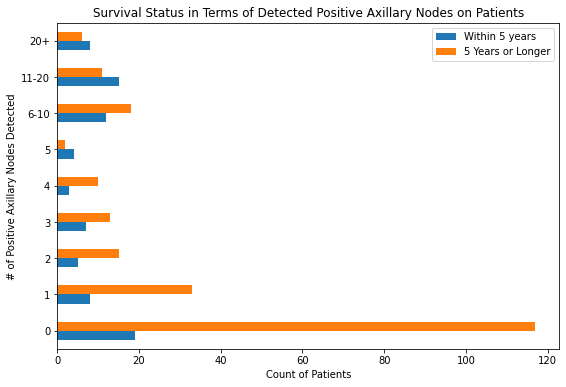

In [ ]:
# displaying survival status distribution based on # of axillary nodes values/groups through bar chart

index = [STATUS_AXILLARY["# of Axillary"][0], STATUS_AXILLARY["# of Axillary"][1], STATUS_AXILLARY["# of Axillary"][2], STATUS_AXILLARY["# of Axillary"][3],
         STATUS_AXILLARY["# of Axillary"][4], STATUS_AXILLARY["# of Axillary"][5], STATUS_AXILLARY["# of Axillary"][6], STATUS_AXILLARY["# of Axillary"][7],
         STATUS_AXILLARY["# of Axillary"][8]]

STATUS_AXILLARY_PLOT = pd.DataFrame ({"Within 5 years": [status_axillary_value0[0], status_axillary_value0[1], status_axillary_value0[2], status_axillary_value0[3], 
                                                        status_axillary_value0[4], status_axillary_value0[5], status_axillary_value0[6], status_axillary_value0[7],
                                                status_axillary_value0[8]],
                                      "5 Years or Longer": [status_axillary_value1[0], status_axillary_value1[1], status_axillary_value1[2], status_axillary_value1[3], 
                                                status_axillary_value1[4], status_axillary_value1[5], status_axillary_value1[6], status_axillary_value1[7],
                                                status_axillary_value1[8]]}, index=index)

STATUS_AXILLARY_PLOT.plot(kind="barh", figsize=(9,6)) 
plt.xlabel('Count of Patients')
plt.ylabel('# of Positive Axillary Nodes Detected')
plt.title('Survival Status in Terms of Detected Positive Axillary Nodes on Patients')

Text(0.5, 1.0, 'Number of Axillary Nodes Detected from Patients who died within 5 years')

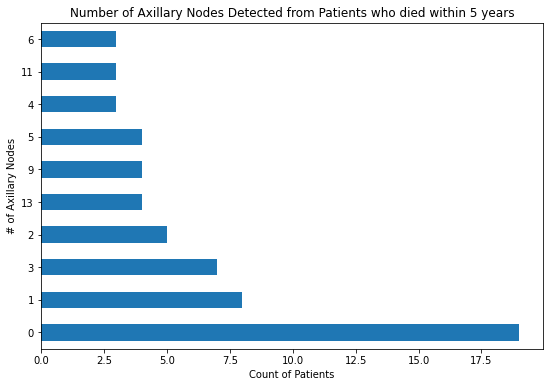

In [ ]:
# Display the most frequent # of axillary node values distribution in terms of "within 5 years" survival status through bar graph
STAT_AXILLARY0_VALUES = df.groupby("Status").get_group(0)["Axillary"].value_counts().head(10)
STAT_AXILLARY0_VALUES.plot(kind="barh", figsize=(9,6)) # plot the bar chart
plt.xlabel('Count of Patients')
plt.ylabel('# of Axillary Nodes')
plt.title('Number of Axillary Nodes Detected from Patients who died within 5 years')

Text(0.5, 1.0, 'Number of Axillary Nodes Detected from Patients who survived for 5 years or longer')

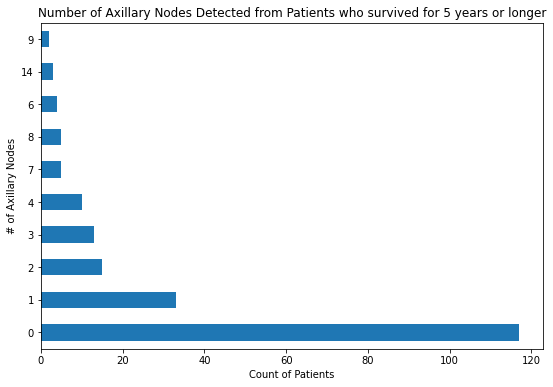

In [ ]:
# Display the most frequent # of axillary node values distribution in terms of "5 years or longer" survival status through bar graph
STAT_AXILLARY1_VALUES = df.groupby("Status").get_group(1)["Axillary"].value_counts().head(10)
STAT_AXILLARY1_VALUES.plot(kind="barh", figsize=(9,6)) # plot the bar chart
plt.xlabel('Count of Patients')
plt.ylabel('# of Axillary Nodes')
plt.title('Number of Axillary Nodes Detected from Patients who survived for 5 years or longer')

### Age and Number of Positive Axillary Nodes Detected

In [ ]:
# displaying the total axillary node count of each 5 age groups 

axillary_values = pd.Series([df["Axillary"].loc[(df["Age"] >= 30) & (df["Age"]<= 40)].sum(), 
                             df["Axillary"].loc[(df["Age"] >= 41) & (df["Age"]<= 50)].sum(), 
                             df["Axillary"].loc[(df["Age"] >= 51) & (df["Age"]<= 60)].sum(),
                             df["Axillary"].loc[(df["Age"] >= 61) & (df["Age"]<= 70)].sum(),
                             df["Axillary"].loc[(df["Age"] >= 71)].sum()])

total_axillary = axillary_values.sum()

AGE_AXILLARY = pd.DataFrame({"Age":[age_count_df["Age Group"][0], age_count_df["Age Group"][1], age_count_df["Age Group"][2], 
                                    age_count_df["Age Group"][3], age_count_df["Age Group"][4]],
                             "Count":[age_count[0], age_count[1], age_count[2], age_count[3], age_count[4]],
                             "# of Axillary": [axillary_values[0], axillary_values[1], axillary_values[2], axillary_values[3], axillary_values[4]],
                             "% of Axillary in Total": [(axillary_values[0]/total_axillary)*100, (axillary_values[1]/total_axillary)*100, 
                                                        (axillary_values[2]/total_axillary)*100, (axillary_values[3]/total_axillary)*100, 
                                                        (axillary_values[4]/total_axillary)*100]})

AGE_AXILLARY["% of Axillary in Total"] = AGE_AXILLARY["% of Axillary in Total"].round(2)
AGE_AXILLARY.style.hide_index()

Age,Count,# of Axillary,% of Axillary in Total
30-40,43,164,13.310000
41-50,93,389,31.570000
51-60,93,453,36.770000
61-70,63,211,17.130000
71+,14,15,1.220000


In [ ]:
total_axillary # overall number of positive axillary nodes detected from all 306 patients

1232

Text(0.5, 1.0, 'Number of Axillary Nodes Detected from Patients in Different Age Groups')

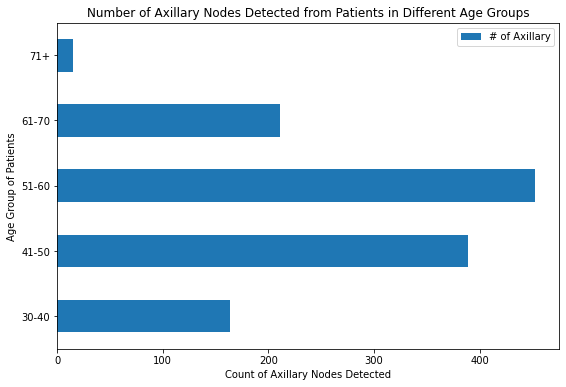

In [ ]:
# plotting the total axillary node count of each 5 age groups through bar graph

AGE_AXILLARY.plot(x="Age",y="# of Axillary",kind="barh", figsize=(9,6))
plt.xlabel('Count of Axillary Nodes Detected')
plt.ylabel('Age Group of Patients')
plt.title('Number of Axillary Nodes Detected from Patients in Different Age Groups')

### Plot Visualization and Correlation Heatmap

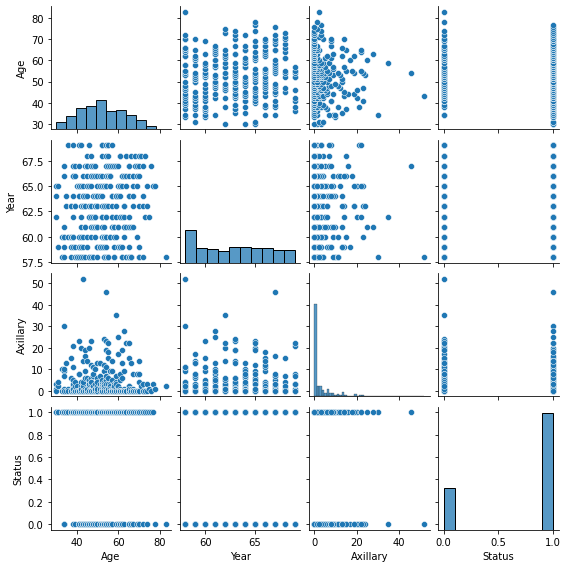

In [ ]:
sns.pairplot(df, height=2) #scatterplot to show pair relationship

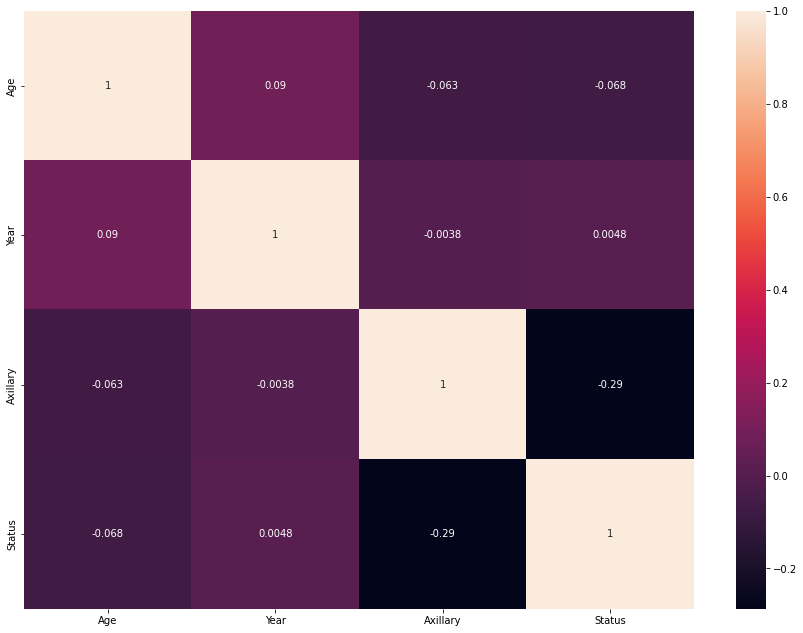

In [ ]:
plt.figure(figsize=(15,11)) #figure size
sns.heatmap(df.corr(), annot=True) #bivariate correlation heatmap of dataset

# Analysis and Interpretation


The dataset contains **306 rows** of inputs with **4 columns** of appropriate patient data on their time of operation. This includes **(1)** the **patient's age** at the time of the operation, **(2)** the **patient's year** of operation (year - 1900), **(3)** the number of **positive axillary nodes detected**, and **(4)** the **survival status** of the patient, whether the patient survived 5 years or longer, or only within 5 years.

*   In terms of the **patient age**, the data is grouped into **5 age groups** ("30-40","41-50","51-60","61-70","71+") in order to be able to easily analyze the large amount of patient data. Based on analysis, the dataset's patients are mostly around the **41-50** and **51-60** age groups, with **93 patients** each. This is followed by the **61-70** group with **63** patients, **30-40** group with **43** patients, and then the **71+** group with only **14** patients.
*   In terms of **patient's operation year**, the data is grouped into **4 year groups** ("1958-1960", "1961-1963", "1964-1966", "1967-1969") to make analysis easier. Based on the data, the patients were mostly operated during **1958-1960** with a count of **91**. This is then followed by the years **1964-1966** with **87** patients, **1961-1963** with **79** patients, and then **1967-1969** with **49** patients.
*   With the **patients' positive axillary node count**, the data is divided based on the amount of patients per each node count, which was discovered that most patients have axillary node counts are within **0-3 nodes**. From such, the data is divided by 0, 1, 2, 3, 4, 5, 6-10, 11-20, and 20+ axillary nodes found per patient. Based on analysis, **most patients (136)** have **0 positive axillary nodes**, which is then followed by **41 patients** with **1 positive node detected**. After this, around **30 patients** were discovered to have **6-10 axillary nodes**, and then **20 patients** each for **2 and 3 nodes detected**. Aside from these, the other node counts were only recorded from a few patients. This shows that there is **44.44%** chance of not getting a positive axillary node due to breast cancer.
*   Lastly, the analysis on the **patient's survival status** after the surgery displayed that **225 out of 306 patients** who underwent the surgery were able to survive for atleast **5 years or more**, while there are **81 patients** who were only able to survive **within the 5 years** since their surgery.











For the variable analysis, each of the independent variables of **age, year, and # of axillary nodes** are each analyzed in pairs with the overall **survival status** of the patients. The **# of axillary nodes** is also analyzed together with **age** to check any relationship. The values are visualized through a pairplot scatter grid and a bivariate correlation heatmap.
  
> In the analysis between **the patients' age and survival status**, the data is analyzed in terms of the 5 age groups and each age separately.
*   In terms of the **5 age groups**, it could be easily seen that patients who were **51-60** during their operations had the most individuals who survived for 5 years or longer with **67 patients**, while only **10 patients** for **71+**. Meanwhile, the age group of **41-50** have the most patients who only survived within 5 years with **29 patients** while both ages **30-40 and 71+** have the least with **4 patients** each. It should be pointed out there is an imbalance in the dataset that contributes to these results. Regardless, the frequency result still displays that most of the patients regardless of the age groups were able to survive for 5 years or longer.
*   In terms of **individual age**, the top patient ages that survived within 5 years include **age 53** with **6 patients** and **ages 46, 52, 54, 65, and 43** with **4 patients** each. Meanwhile, the ages with the most patients surviving 5 years or longer are **ages 50 and 52** with **10 patients**, and **ages 38 and 54** with **9 patients**. 
>>> Looking at the results, there is no clear visible or patterns keypoints that differentiates the two results other than there are more patients surviving 5 years or longer after surgery. However, it could be pointed out that most of these top results are mostly within the 41-50 and 51-60 ranges, as most patients in the dataset are within these age groups.

> In the analysis between the **patient's year of operation and survival status**, the data is analyzed in terms of 4 year groups and each year separately.
*   The **year group** with the most patients who survived for 5 years or longer is** 1958-1960** with **66 patients**, while the lowest one is **1967-1969** with **38 patients**. For patients who only survived within 5 years, the highest count is during **1964-1966** with **27 patients** while the lowest count is with **1967-1969** with **11 patients**. In general, the frequency result displays that a good majority of patients during these years were able to survive for 5 years or longer.
*   The **top years** in which the patients who only survived within 5 years since surgery year are **1965** with **13 patients**, **1958** with **12 patients**, and **1959** with **9 patients**. Meanwhile, the top 3 for patients who survived for 5 years or longer include **ages 58 and 60** with **24 patients**, **ages 61 and 64** with **23 patients**, and **ages 63 and 66** with **22 patients**. 
>>> Aside from such, it could also be seen that in general, the more latter the date, the smaller the amount of patients that underwent breast cancer surgery, especially during 1967-1969. This could be due to improving technology, experience, and expertise in the surgery process or lesser breast cancer cases due to external factors.

> In the analysis between the **detected number of positive axillary nodes on patients and their survival status**, the data is analyzed in terms of 9 axillary node count/groups based on count and each axillary node count separately.
*   In the **grouped axillary node count**, the highest count of patients surviving 5 years or longer is with **0 nodes** with **117 patients**, while the lowest are patients with **5 nodes** detected with **2 patients**. For patients surviving within 5 years, the highest count goes to **0 nodes** detected as well, with **19 patients**. The lowest count goes to **4 nodes** detected, with **3 patients**. In terms of frequency, most of the patients in each group/value were able to survive for 5 years or longer, except for the node counts of 5, 11-20, and 20+.
*   Analyzing **the axillary nodes separately**, the top 3 for patients who only survived within 5 years are **0 nodes** found with **19 patients**, **1 node** found with **8 patients**, and **3 nodes** found with **7 patients**. Meanwhile, the top 3 for patients who survived for 5 years or longer starts with a significant amount of **117 patients** with **0 nodes** detected, followed by **33 patients** with **1 node** detected, and then by **15 patients** with **2 nodes** detected. 
>>> Analyzing the dataset, it could be seen that having 0 to a few number of axillary nodes is the common occurrance for breast cancer surgery patients. It could also be pointed out that patients who have a node count between 0-4 may have a higher survival rate, however due to the rarity of patients getting a much higher axillary node count, it is not easily identifiable on how significant the difference is due to data imbalance. 

> For the analysis between **age and number of axillary nodes detected**, the data is analyzed in terms of the 5 age groups and the total axillary nodes detected among each.
*   The age group with the most positive axillary nodes detected are with the **ages 51-60** with **453 nodes**, while the lowest are with the **ages 71+** with **15 nodes**. Overall, the amount of positive axillary nodes detected from the 306 patients are **1232 nodes**. 
>>> Similar to the previous analyses, the imbalance of the dataset significantly affects the amount of axillary nodes on each age group. This makes it not as reliable to identify whether the two variables have a relationship.





In terms of the **correlation heatmap/scatterplot** visualization of the dataset, only one relationship has some degree of correlation between each other. This is between the patient's **survival status **and **number of positive axillary nodes detected**, with a **weak negative correlation** value of **-0.29**. This being the only significant result may be due to the imbalance in the dataset involving age and year, which makes it more difficult to make a correlation with the survival status variable.


# Conclusion

From the following analysis and interpretation results, the following could be concluded:

*   Most patients who were able to survive were around ages 40-60.
*   Most patients were operated during 1958 to 1966, and there is a decrease in amount of surgery patients by 1967 to 1969.
*   Most patients who were able to survive longer were found to have between 0 to 4 positive axillary nodes as a breast cancer patient.
*   The breast cancer surgery is mostly successful in making patients live with a longer life expectancy, with a 73.53% chance of giving a patient 5 years or longer life.
*   There is a weak inverse relationship between the patient's survival status and the number of positive axillary nodes detected. Therefore the higher the positive nodes detected from the patient, the lower their chances of surviving for 5 years or longer after the surgery.
*   The dataset is not able to accurately represent correlations between variables for the most part due to dataset imbalances.




# Deep Learning Model

## Splitting the Data

In [ ]:
# split data into input and output
X = df.drop('Status', axis=1) # dataframe containing input data
Y = df['Status'] # dataframe containing output data

In [ ]:
# split data into test and training data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=10, test_size=0.3, shuffle=True)

## Defining the Model

In [ ]:
# defining layers and nodes of the model
model = keras.Sequential()
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(79, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling and Fitting the Model

In [ ]:
# compile and fit model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.40, batch_size=30, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 64ms/step - loss: 5.8092 - accuracy: 0.6875 - val_loss: 2.2237 - val_accuracy: 0.7558
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 1.9085 - accuracy: 0.6719 - val_loss: 1.2625 - val_accuracy: 0.2326
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 1.3476 - accuracy: 0.3203 - val_loss: 0.7672 - val_accuracy: 0.4884
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7184 - accuracy: 0.7031 - val_loss: 0.7762 - val_accuracy: 0.7558
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.8301 - accuracy: 0.6953 - val_loss: 0.5993 - val_accuracy: 0.7674
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5484 - accuracy: 0.7578 - val_loss: 0.6782 - val_accuracy: 0.6047
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5650 - accuracy: 0.7344 - val_loss: 0.5688 - val_accuracy: 0.7442
Epoch 8/100
5/5 [=====

## Evaluating the Model

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.7717


[0.5586131811141968, 0.77173912525177]

In [ ]:
model.evaluate(x_train, y_train)

7/7 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7523


[0.5328477025032043, 0.7523364424705505]

# Plotting the Model Training


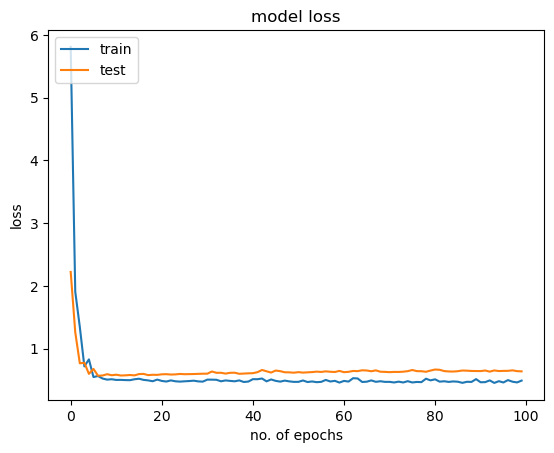

In [ ]:
# display graph of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the Model

In [ ]:
model.save("haberman_model.h5") # save the model

# Confusion Matrix

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
ypred = (model.predict(x_test)>0.50).astype('int32') # predict the survival status for the testing set

3/3 [==============================] - 0s 2ms/step


In [ ]:
confusion_matrix(y_test, ypred)

array([[ 8, 12],
       [ 9, 63]], dtype=int64)

# Prediction

In [1]:
def result(value):
    if value == 1: return print("Patient will survive for 5 years or more")
    else: return print("Patient will die within 5 years")

In [8]:
from numpy import array

features = np.array([[56, 63, 3,]]) # array of values with a target value of 1 - 5 years or more
# 56 - Age, 63 - Year (1900s), 3 - # of Axillary Nodes Detected

Y_new = (model.predict(features)>0.50).astype("int32") # predict the target usage for the new features

print(Y_new)
result(Y_new)

1/1 [==============================] - 0s 46ms/step
[[1]]
Patient will survive for 5 years or more


In [6]:
features = np.array([[56, 69, 27,]]) # array of values with a target value of 0 - within 5 years
# 56 - Age, 69 - Year (1900s), 27 - # of Axillary Nodes Detected
Pred = keras.models.load_model("haberman_model.h5")

print((Pred.predict(features)>0.50).astype("int32")) # predict the target usage for the new features
result(Pred)

1/1 [==============================] - 0s 44ms/step
[[0]]
Patient will die within 5 years
